In [46]:
# ---------- Main ----------
image = cv2.imread(IMAGE_PATH, 0)
template = cv2.imread(TEMPLATE_PATH, 0)
output = image.copy()
detections = 0

Rotation Invariant Template Matching Result:


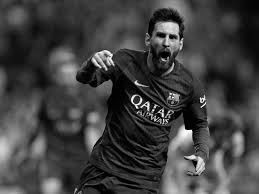

In [47]:
# ======================================
# PART 1: Rotation Invariant Template Matching
# ======================================

# ---------- Parameters ----------
ANGLES = range(-45, 46, 5)

# ---------- Functions ----------
def rotate_template(template, angle):
    """
    Rotates the template by a given angle.
    """
    h, w = template.shape
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(template, matrix, (w, h))

for angle in ANGLES:
    rotated_template = rotate_template(template, angle)
    result = cv2.matchTemplate(image, rotated_template, cv2.TM_CCOEFF_NORMED)
    locations = np.where(result >= THRESHOLD)

    h, w = rotated_template.shape
    for pt in zip(*locations[::-1]):
        cv2.rectangle(output, pt, (pt[0] + w, pt[1] + h), 255, 2)

# ---------- Display Result ----------
print("Rotation Invariant Template Matching Result:")
cv2_imshow(output)


Scale Invariant Template Matching Result:


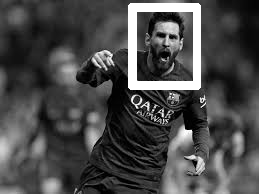

In [48]:
# ======================================
# PART 2: Scale Invariant Template Matching
# ======================================

# ---------- Parameters ----------
SCALES = np.linspace(0.5, 1.5, 15)

for scale in SCALES:
    resized_template = cv2.resize(template, None, fx=scale, fy=scale)

    if (resized_template.shape[0] > image.shape[0] or
        resized_template.shape[1] > image.shape[1]):
        continue

    result = cv2.matchTemplate(
        image, resized_template, cv2.TM_CCOEFF_NORMED
    )
    locations = np.where(result >= THRESHOLD)

    h, w = resized_template.shape
    for pt in zip(*locations[::-1]):
        cv2.rectangle(output, pt, (pt[0] + w, pt[1] + h), 255, 2)

# ---------- Display Result ----------
print("Scale Invariant Template Matching Result:")
cv2_imshow(output)


❌ Template found nowhere in the image.
Multi-Object Detection Result:


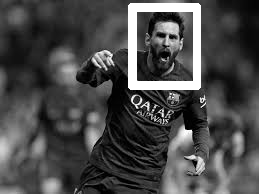

In [49]:
# ======================================
# PART 3: Multi-Object Template Detection
# ======================================

result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
locations = np.where(result >= THRESHOLD)

if len(locations[0]) == 0:
    print("❌ Template found nowhere in the image.")
else:
    h, w = template.shape
    for pt in zip(*locations[::-1]):
        cv2.rectangle(output, pt, (pt[0] + w, pt[1] + h), 255, 2)
    print("✅ Template detected in multiple locations.")

# ---------- Display Result ----------
print("Multi-Object Detection Result:")
cv2_imshow(output)

✅ Template detected 13 times.
Full Invariant Template Matching Result:


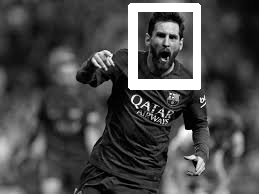

In [50]:
# ======================================
# PART 4 (BONUS): Rotation + Scale + Multi-Object Detection
# ======================================

# ---------- Parameters ----------
SCALES = np.linspace(0.5, 1.5, 10)
ANGLES = range(-45, 46, 10)

# ---------- Functions ----------
def rotate_template(template, angle):
    h, w = template.shape
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(template, matrix, (w, h))

for scale in SCALES:
    scaled_template = cv2.resize(template, None, fx=scale, fy=scale)

    if (scaled_template.shape[0] > image.shape[0] or
        scaled_template.shape[1] > image.shape[1]):
        continue

    for angle in ANGLES:
        rotated_template = rotate_template(scaled_template, angle)
        result = cv2.matchTemplate(
            image, rotated_template, cv2.TM_CCOEFF_NORMED
        )
        locations = np.where(result >= THRESHOLD)

        h, w = rotated_template.shape
        for pt in zip(*locations[::-1]):
            cv2.rectangle(output, pt, (pt[0] + w, pt[1] + h), 255, 2)
            detections += 1

# ---------- Final Decision ----------
if detections == 0:
    print("❌ Template not found in the image.")
else:
    print(f"✅ Template detected {detections} times.")

# ---------- Display Result ----------
print("Full Invariant Template Matching Result:")
cv2_imshow(output)
